# Welcome to the 'First steps with pandas'!

After this workshop you can (hopefully) call yourselves Data Scientists!

### Before coding, let's check whether we have proper versions of libraries

You should have:
- Python: 2.7.10
- numpy: 1.11.1
- pandas: 0.18.1
- matplotlib: 1.5.2

In [2]:
import platform
print "Python:", platform.python_version()

import numpy as np
print 'numpy:', np.__version__

import pandas as pd
print 'pandas:', pd.__version__
 
import matplotlib as plt
print 'matplotlib:', plt.__version__

Python: 2.7.10
numpy: 1.11.1
pandas: 0.18.1
matplotlib: 1.5.2


## What is pandas?

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## Why to use it?

### We need to be able to develop code quickly and cheaply... and it should be readable

In [3]:
# TODO Make even more impressive example

# Weekly mean views of Michal Pazdan on Wikipedia in Jan '15

# pd.read_json('http://stats.grok.se/json/en/201501/Micha%C5%82_Pazdan') \
pd.read_json('data/cached_wiki_Pazdan.json') \
    .resample('1W') \
    .mean()

,daily_views,month,rank
2015-01-04,6.500000,201501.0,-1.0
2015-01-11,5.428571,201501.0,-1.0
2015-01-18,6.714286,201501.0,-1.0
2015-01-25,5.857143,201501.0,-1.0
2015-02-01,5.833333,201501.0,-1.0


### We need to develop fast code

In [4]:
# TODO assert results

some_data = [ list(range(1,100)) for x in range(1,1000) ]
some_df = pd.DataFrame(some_data)

def standard_way(data):
    result = []
    for row in data:
        result.append([x*2 for x in row])
    return result


def pandas_way(df):
    return df * 2

In [5]:
%timeit standard_way(some_data)

100 loops, best of 3: 9.35 ms per loop


In [7]:
%timeit pandas_way(some_df)

1000 loops, best of 3: 225 µs per loop


### It is hard write everything from scratch.. and it's easy to make mistakes.

http://pandas.pydata.org/pandas-docs/stable/api.html

### It can handle nicely missing data (and that's a common case)..

In [8]:
missing_data = pd.DataFrame([
    dict(name="Jacek", height=174),
    dict(name="Mateusz", weight=81),
    dict(name="Lionel Messi", height=169, weight=67)
])
missing_data

,height,name,weight
0,174.0,Jacek,NaN
1,NaN,Mateusz,81.0
2,169.0,Lionel Messi,67.0


In [9]:
missing_data.fillna(missing_data.mean())

,height,name,weight
0,174.0,Jacek,74.0
1,171.5,Mateusz,81.0
2,169.0,Lionel Messi,67.0


### It has a very cool name.

![caption](files/pandas.jpg)

###  Library highlights

http://pandas.pydata.org/#library-highlights

## So let's start by learning data structures

### Series

> Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [10]:
strengths = pd.Series([400, 200, 300, 400, 500])
strengths

0    400
1    200
2    300
3    400
4    500
dtype: int64

In [11]:
names = pd.Series(["Batman", "Robin", "Spiderman", "Robocop", "Terminator"])
names

0        Batman
1         Robin
2     Spiderman
3       Robocop
4    Terminator
dtype: object

### DataFrame

> DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

In [12]:
heroes = pd.DataFrame({
    'hero': names,
    'strength': strengths
})
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [13]:
other_heroes = pd.DataFrame([
    dict(hero="Hercules", strength=800),
    dict(hero="Konan")
])
other_heroes

,hero,strength
0,Hercules,800.0
1,Konan,NaN


In [14]:
another_heroes = pd.DataFrame([
    pd.Series(["Bolek", 10, 3], index=["hero", "strength", "cookies"]),
    pd.Series(["Lolek", 20, 0], index=["hero", "strength", "cookies"])
])
another_heroes

,hero,strength,cookies
0,Bolek,10,3
1,Lolek,20,0


In [15]:
another_heroes['cookies']

0    3
1    0
Name: cookies, dtype: int64

In [16]:
another_heroes[ ['hero', 'cookies'] ]

,hero,cookies
0,Bolek,3
1,Lolek,0


#### Selecting
```[string] --> Series
[ list of strings ] --> DataFrame```

### EXERCISE

Create such DataFrame in 3 different ways

```
                                         movie_title  imdb_score
0                                            Avatar          7.9
1          Pirates of the Caribbean: At World's End          7.1
2                                           Spectre          6.8
```

Help: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#from-dict-of-series-or-dicts

In [17]:
# Solution 1 with dict of Series

titles = pd.Series(["Avatar", "Pirates of the Caribbean: At World's End", "Spectre"])
imdb_scores = pd.Series([7.9, 7.1, 6.8])

pd.DataFrame({'movie_title': titles, 'imdb_score': imdb_scores})

,imdb_score,movie_title
0,7.9,Avatar
1,7.1,Pirates of the Caribbean: At World's End
2,6.8,Spectre


In [18]:
# Solution 2 with list of dicts

pd.DataFrame([
    dict(movie_title="Avatar", imdb_score=7.9),
    dict(movie_title="Pirates of the Caribbean: At World's End", imdb_score=7.1),
    dict(movie_title="Spectre", imdb_score=6.8),
])

,imdb_score,movie_title
0,7.9,Avatar
1,7.1,Pirates of the Caribbean: At World's End
2,6.8,Spectre


In [19]:
# Solution 3 with list of Series

pd.DataFrame([
    pd.Series(["Avatar", 7.9], index=['movie_title', 'imdb_score']),
    pd.Series(["Pirates of the Caribbean: At World's End", 7.1], index=['movie_title', 'imdb_score']),
    pd.Series(["Spectre", 6.8], index=['movie_title', 'imdb_score'])
])

,movie_title,imdb_score
0,Avatar,7.9
1,Pirates of the Caribbean: At World's End,7.1
2,Spectre,6.8


## I/O part I

In [20]:
# Uncomment and press tab..
# pd.read_
# SQL, csv, hdfs

In [21]:
pd.read_csv?

In [22]:
# TODO change this dataset..
!head -n 50 data/cached_wiki_Pazdan.json

{
    "daily_views": {
        "1420070400000": 2,
        "1420156800000": 10,
        "1420243200000": 4,
        "1420329600000": 10,
        "1420416000000": 3,
        "1420502400000": 10,
        "1420588800000": 5,
        "1420675200000": 11,
        "1420761600000": 3,
        "1420848000000": 5,
        "1420934400000": 1,
        "1421020800000": 4,
        "1421107200000": 20,
        "1421193600000": 3,
        "1421280000000": 7,
        "1421366400000": 4,
        "1421452800000": 5,
        "1421539200000": 4,
        "1421625600000": 6,
        "1421712000000": 1,
        "1421798400000": 5,
        "1421884800000": 3,
        "1421971200000": 9,
        "1422057600000": 11,
        "1422144000000": 6,
        "1422230400000": 8,
        "1422316800000": 5,
        "1422403200000": 6,
        "1422489600000": 8,
        "1422576000000": 2,
        "1422662400000": 6
    },
    "month": {
        "1420070400000": 201501,
        "1420156800000": 201501,
        "1420243

In [23]:
pd.read_json('data/cached_wiki_Pazdan.json').head()

,daily_views,month,project,rank,title
2015-01-01,2,201501,en,-1,Michał_Pazdan
2015-01-02,10,201501,en,-1,Michał_Pazdan
2015-01-03,4,201501,en,-1,Michał_Pazdan
2015-01-04,10,201501,en,-1,Michał_Pazdan
2015-01-05,3,201501,en,-1,Michał_Pazdan


### EXERCISE

1. Load movies from data/movie_metadata.csv and...
2. Analyze what dimensions and columns it has..

In [27]:
# Solution 1

#E: movies = 

movies = pd.read_csv('data/movie_metadata.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [25]:
assert movies.shape == (5043, 28)

In [28]:
# Solution 2

movies.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

## Filtering

In [29]:
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [30]:
heroes['strength'] == 400

0     True
1    False
2    False
3     True
4    False
Name: strength, dtype: bool

In [31]:
heroes.strength == 400

0     True
1    False
2    False
3     True
4    False
Name: strength, dtype: bool

Boolean indexing

In [32]:
heroes[heroes['strength'] == 400]

,hero,strength
0,Batman,400
3,Robocop,400


In [33]:
heroes[heroes['strength'] > 400]

,hero,strength
4,Terminator,500


In [34]:
heroes[200 < heroes['strength'] < 400]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [35]:
heroes[
    (heroes['strength'] > 200) & 
    (heroes['strength'] < 400)
]

,hero,strength
2,Spiderman,300


In [36]:
heroes[
    (heroes['strength'] <= 200) |
    (heroes['strength'] >= 400)
]

,hero,strength
0,Batman,400
1,Robin,200
3,Robocop,400
4,Terminator,500


`~` is an operator for negation

In [40]:
~(heroes['strength'] == 400)

0    False
1     True
2     True
3    False
4     True
Name: strength, dtype: bool

In [41]:
heroes[~(
    (heroes['strength'] <= 200) |
    (heroes['strength'] >= 400)
)]

,hero,strength
2,Spiderman,300


In [42]:
heroes[
    heroes['hero'].isin(['Batman', 'Robin'])
]

,hero,strength
0,Batman,400
1,Robin,200


### EXERCISE

1. What movies has been directed by Clint Eastwood?
2. What movies have earned above $500m?
3. Are there any Polish movies?
4. What % of movies are in color?
5. What are really popular great movies? (> 100k FB likes, > 8.5 IMDB score)
6. In what movies main role was played by brutals like "Jason Statham", "Sylvester Stallone" or god ("Morgan Freeman")?

In [43]:
# Solution 1

movies[movies['director_name'] == "Clint Eastwood"]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
664,Black and White,Clint Eastwood,169.0,130.0,16000.0,416.0,Courtney B. Vance,16000.0,90454043.0,Action|Adventure|Thriller,...,326.0,English,USA,PG-13,65000000.0,2000.0,495.0,6.4,2.35,0
772,Color,Clint Eastwood,306.0,134.0,16000.0,204.0,Morgan Freeman,13000.0,37479778.0,Biography|Drama|History|Sport,...,259.0,English,USA,PG-13,60000000.0,2009.0,11000.0,7.4,2.35,23000
814,Color,Clint Eastwood,490.0,133.0,16000.0,318.0,Leonard Roberts,14000.0,350123553.0,Action|Biography|Drama|History|Thriller|War,...,916.0,English,USA,R,58800000.0,2014.0,962.0,7.3,2.35,112000
877,Color,Clint Eastwood,264.0,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,Crime|Drama|Mystery|Thriller,...,387.0,English,USA,R,55000000.0,2008.0,963.0,7.8,2.35,14000
906,Color,Clint Eastwood,279.0,135.0,16000.0,310.0,Chris Bauer,23000.0,33574332.0,Drama|History|War,...,415.0,English,USA,R,90000000.0,2006.0,638.0,7.1,2.35,0
973,Color,Clint Eastwood,76.0,121.0,16000.0,826.0,Mark Margolis,16000.0,50007168.0,Action|Crime|Drama|Thriller,...,142.0,English,USA,R,50000000.0,1997.0,1000.0,6.7,2.35,1000
997,Color,Clint Eastwood,315.0,129.0,16000.0,447.0,Jay Mohr,13000.0,32741596.0,Drama|Fantasy,...,323.0,English,USA,PG-13,50000000.0,2010.0,563.0,6.5,2.35,16000
1004,Color,Clint Eastwood,146.0,110.0,16000.0,581.0,Anjelica Huston,16000.0,26199517.0,Action|Crime|Drama|Mystery|Thriller,...,260.0,English,USA,R,50000000.0,2002.0,1000.0,6.4,2.35,705
1245,Color,Clint Eastwood,249.0,134.0,16000.0,235.0,Steve Schirripa,880.0,47034272.0,Biography|Drama|Music|Musical,...,190.0,English,USA,R,40000000.0,2014.0,413.0,6.9,2.35,16000
1453,Color,Clint Eastwood,392.0,137.0,16000.0,363.0,Naomi Watts,29000.0,37304950.0,Biography|Crime|Drama,...,279.0,English,USA,R,35000000.0,2011.0,6000.0,6.6,2.35,16000


In [44]:
# Solution 2

movies[movies['gross'] > 500e6]['movie_title']

0               Avatar 
17        The Avengers 
26             Titanic 
29      Jurassic World 
66     The Dark Knight 
794       The Avengers 
Name: movie_title, dtype: object

In [45]:
# Solution 3

movies[movies['language'] == 'Polish']['movie_title']

2824       Dekalog             
2828    The Border             
3207       Dekalog             
4170                       Ida 
Name: movie_title, dtype: object

In [46]:
# Solution 4

movies[movies['color'] == 'Color'].shape[0] / float(movies.shape[0])

0.9547888161808448

In [47]:
# Solution 5

movies[
    (movies['movie_facebook_likes'] > 100000) &
    (movies['imdb_score'] > 8.5)
]['movie_title']

96                  Interstellar 
97                     Inception 
1937    The Shawshank Redemption 
Name: movie_title, dtype: object

In [48]:
# Solution 6

brutals = ["Jason Statham", "Sylvester Stallone"]
god = "Morgan Freeman"

movies[
    (movies['actor_1_name'].isin(brutals)) |
    (movies['actor_1_name'] == god) 
]['movie_title'].head()

45             Furious 7 
235             Oblivion 
299    The Expendables 2 
317    The Expendables 3 
367              Ben-Hur 
Name: movie_title, dtype: object

## I/O part O

In [49]:
heroes.values

array([['Batman', 400],
       ['Robin', 200],
       ['Spiderman', 300],
       ['Robocop', 400],
       ['Terminator', 500]], dtype=object)

In [50]:
heroes.to_dict()

{'hero': {0: 'Batman',
  1: 'Robin',
  2: 'Spiderman',
  3: 'Robocop',
  4: 'Terminator'},
 'strength': {0: 400, 1: 200, 2: 300, 3: 400, 4: 500}}

In [51]:
heroes.to_dict('records')

[{'hero': 'Batman', 'strength': 400},
 {'hero': 'Robin', 'strength': 200},
 {'hero': 'Spiderman', 'strength': 300},
 {'hero': 'Robocop', 'strength': 400},
 {'hero': 'Terminator', 'strength': 500}]

In [52]:
print heroes.to_json()

{"hero":{"0":"Batman","1":"Robin","2":"Spiderman","3":"Robocop","4":"Terminator"},"strength":{"0":400,"1":200,"2":300,"3":400,"4":500}}


In [53]:
print heroes.to_json(orient='records')

[{"hero":"Batman","strength":400},{"hero":"Robin","strength":200},{"hero":"Spiderman","strength":300},{"hero":"Robocop","strength":400},{"hero":"Terminator","strength":500}]


In [54]:
print heroes.to_csv()

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500



In [55]:
print heroes.to_csv(index=False)

hero,strength
Batman,400
Robin,200
Spiderman,300
Robocop,400
Terminator,500



### EXERCISE

1. Create a csv with movie titles and cast (actors) of movies with budget above $200m
2. Create a list of dicts with movie titles and facebook likes of all Christopher Nolan's movies

In [56]:
movies.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [57]:
# Solution 1
cols = [
    'movie_title',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name', 
    'budget'
]

movies[movies['budget'] > 200e6][cols].to_csv("data/expensive-cast.csv", index=False)

In [58]:
# Solution 2

cols = [
    'movie_title',
    'movie_facebook_likes'
]

movies[movies['director_name'] == 'Christopher Nolan'][cols].to_dict('r')

[{'movie_facebook_likes': 164000,
  'movie_title': 'The Dark Knight Rises\xc2\xa0'},
 {'movie_facebook_likes': 37000, 'movie_title': 'The Dark Knight\xc2\xa0'},
 {'movie_facebook_likes': 349000, 'movie_title': 'Interstellar\xc2\xa0'},
 {'movie_facebook_likes': 175000, 'movie_title': 'Inception\xc2\xa0'},
 {'movie_facebook_likes': 15000, 'movie_title': 'Batman Begins\xc2\xa0'},
 {'movie_facebook_likes': 0, 'movie_title': 'Insomnia\xc2\xa0'},
 {'movie_facebook_likes': 49000, 'movie_title': 'The Prestige\xc2\xa0'},
 {'movie_facebook_likes': 40000, 'movie_title': 'Memento\xc2\xa0'}]

## New columns

In [59]:
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [60]:
heroes['health'] = np.NaN
heroes.head()

,hero,strength,health
0,Batman,400,NaN
1,Robin,200,NaN
2,Spiderman,300,NaN
3,Robocop,400,NaN
4,Terminator,500,NaN


In [61]:
heroes['health'] = 100
heroes.head()

,hero,strength,health
0,Batman,400,100
1,Robin,200,100
2,Spiderman,300,100
3,Robocop,400,100
4,Terminator,500,100


In [62]:
heroes['height'] = [180, 170, 175, 190, 185]
heroes

,hero,strength,health,height
0,Batman,400,100,180
1,Robin,200,100,170
2,Spiderman,300,100,175
3,Robocop,400,100,190
4,Terminator,500,100,185


In [63]:
heroes['is_hungry'] = pd.Series([True, False, False, True, True])
heroes

,hero,strength,health,height,is_hungry
0,Batman,400,100,180,True
1,Robin,200,100,170,False
2,Spiderman,300,100,175,False
3,Robocop,400,100,190,True
4,Terminator,500,100,185,True


In [64]:
heroes['strength'] / heroes['height']

0    2.222222
1    1.176471
2    1.714286
3    2.105263
4    2.702703
dtype: float64

In [65]:
heroes['strength_per_cm'] = heroes['strength'] / heroes['height']
heroes

,hero,strength,health,height,is_hungry,strength_per_cm
0,Batman,400,100,180,True,2.222222
1,Robin,200,100,170,False,1.176471
2,Spiderman,300,100,175,False,1.714286
3,Robocop,400,100,190,True,2.105263
4,Terminator,500,100,185,True,2.702703


In [66]:
# Mati comments: na stringach zazwyczaj działa się tym .str.cos, prawie w ogole nie trzeba robić mapów... 
#nie jestem pewien czy to edukacyjne pokazywać mapa na typie, ktory raczej nie powienien być kojarzony z mapem :P

In [67]:
pd.Series(['Batman', 'Robin']).map(lambda x: x)

0    Batman
1     Robin
dtype: object

In [68]:
pd.Series(['Batman', 'Robin']).map(lambda x: x[:2])

0    Ba
1    Ro
dtype: object

In [69]:
heroes['code'] = heroes['hero'].map(lambda name: name[:2])
heroes

,hero,strength,health,height,is_hungry,strength_per_cm,code
0,Batman,400,100,180,True,2.222222,Ba
1,Robin,200,100,170,False,1.176471,Ro
2,Spiderman,300,100,175,False,1.714286,Sp
3,Robocop,400,100,190,True,2.105263,Ro
4,Terminator,500,100,185,True,2.702703,Te


In [73]:
heroes.apply(lambda x: x)

,hero,strength,health,height,is_hungry,strength_per_cm,code
0,Batman,400,100,180,True,2.222222,Ba
1,Robin,200,100,170,False,1.176471,Ro
2,Spiderman,300,100,175,False,1.714286,Sp
3,Robocop,400,100,190,True,2.105263,Ro
4,Terminator,500,100,185,True,2.702703,Te


In [74]:
heroes.applymap(lambda x: x)

,hero,strength,health,height,is_hungry,strength_per_cm,code
0,Batman,400,100,180,True,2.222222,Ba
1,Robin,200,100,170,False,1.176471,Ro
2,Spiderman,300,100,175,False,1.714286,Sp
3,Robocop,400,100,190,True,2.105263,Ro
4,Terminator,500,100,185,True,2.702703,Te


TODO ask Matti whether it's fine and correct

```
map: 1 => 1
apply: n => 1
applymap: m => n
```

In [80]:
# EXTRA 1
# TODO not sure where to place it. Maybe higher
heroes['strength'].value_counts()

400    2
300    1
500    1
200    1
Name: strength, dtype: int64

In [81]:
# EXTRA 2
# TODO not sure where to place it. Maybe higher
heroes.sort_values('strength')

,hero,strength,health,height,is_hungry,strength_per_cm,code
1,Robin,200,100,170,False,1.176471,Ro
2,Spiderman,300,100,175,False,1.714286,Sp
0,Batman,400,100,180,True,2.222222,Ba
3,Robocop,400,100,190,True,2.105263,Ro
4,Terminator,500,100,185,True,2.702703,Te


In [82]:
# EXTRA 3
# TODO not sure where to place it. Maybe higher, maybe later
heroes.sort_values(['is_hungry', 'code'], ascending=[False, True])

,hero,strength,health,height,is_hungry,strength_per_cm,code
0,Batman,400,100,180,True,2.222222,Ba
3,Robocop,400,100,190,True,2.105263,Ro
4,Terminator,500,100,185,True,2.702703,Te
1,Robin,200,100,170,False,1.176471,Ro
2,Spiderman,300,100,175,False,1.714286,Sp


#### EXERCISE

1. What are 10 most profitable movies?
2. Create a column 'first_genre'. What is the distribution of values in this column?

In [83]:
# Solution 1

movies['profitability'] = movies['gross'] / movies['budget']
movies.sort_values('profitability', ascending=False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profitability
4793,Color,Oren Peli,409.0,84.0,110.0,21.0,Ashley Palmer,189.0,107917283.0,Horror,...,English,USA,R,15000.0,2007.0,109.0,6.3,1.85,12000,7194.485533
4799,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,...,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754,2715.660550
4707,Black and White,Daniel Myrick,360.0,81.0,19.0,39.0,Joshua Leonard,170.0,140530114.0,Horror,...,English,USA,R,60000.0,1999.0,170.0,6.4,1.33,0,2342.168567
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,English,USA,R,25000.0,1995.0,111.0,6.6,1.85,265,409.864000
4936,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,369.427285
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0,369.427285
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,291.560000
4956,Color,Travis Cluff,159.0,81.0,3.0,7.0,Cassidy Gifford,220.0,22757819.0,Horror|Thriller,...,English,USA,R,100000.0,2015.0,40.0,4.2,1.85,0,227.578190
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,English,USA,PG,65000.0,2004.0,0.0,7.3,1.78,0,177.374892
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000,156.666667


In [84]:
# Solution 2

movies['first_genre'] = movies['genres'].str.split('|').str[0]
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profitability,first_genre
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,3.208885,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1.031347,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0.816629,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1.792523,Action
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,Documentary


## Visualizing data

In [85]:
heroes

,hero,strength,health,height,is_hungry,strength_per_cm,code
0,Batman,400,100,180,True,2.222222,Ba
1,Robin,200,100,170,False,1.176471,Ro
2,Spiderman,300,100,175,False,1.714286,Sp
3,Robocop,400,100,190,True,2.105263,Ro
4,Terminator,500,100,185,True,2.702703,Te


In [86]:
heroes.describe()

,strength,health,height,strength_per_cm
count,5.000000,5.0,5.000000,5.000000
mean,360.000000,100.0,180.000000,1.984189
std,114.017543,0.0,7.905694,0.572896
min,200.000000,100.0,170.000000,1.176471
25%,300.000000,100.0,175.000000,1.714286
50%,400.000000,100.0,180.000000,2.105263
75%,400.000000,100.0,185.000000,2.222222
max,500.000000,100.0,190.000000,2.702703


In [88]:
%matplotlib inline

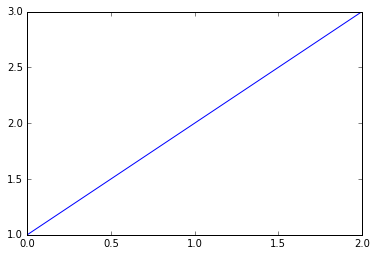

In [90]:
pd.Series([1, 2, 3]).plot()

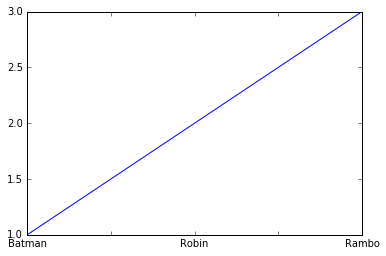

In [91]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot()

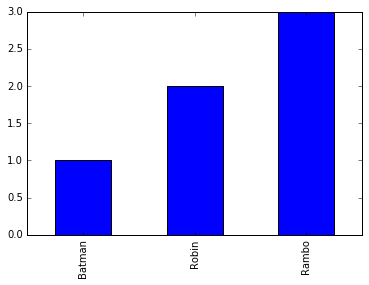

In [92]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='bar')

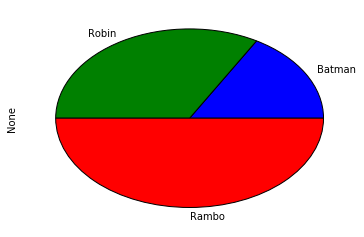

In [93]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='pie')

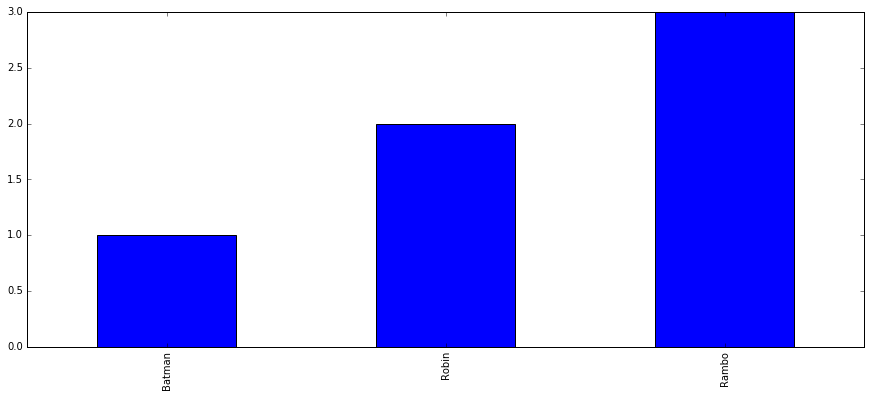

In [94]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(
    kind='bar',
    figsize=(15, 6)
)

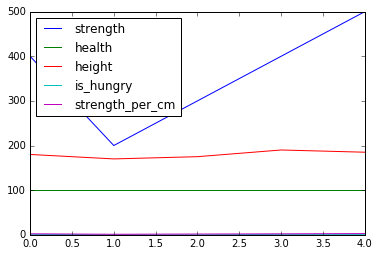

In [95]:
heroes.plot()

In [96]:
indexed_heroes = heroes.set_index('hero')
indexed_heroes

,strength,health,height,is_hungry,strength_per_cm,code
hero,,,,,,
Batman,400,100,180,True,2.222222,Ba
Robin,200,100,170,False,1.176471,Ro
Spiderman,300,100,175,False,1.714286,Sp
Robocop,400,100,190,True,2.105263,Ro
Terminator,500,100,185,True,2.702703,Te


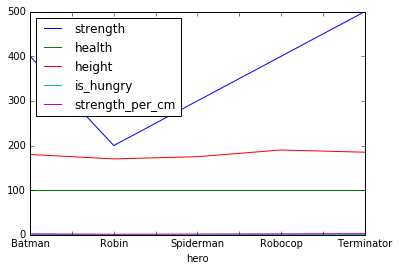

In [97]:
indexed_heroes.plot()

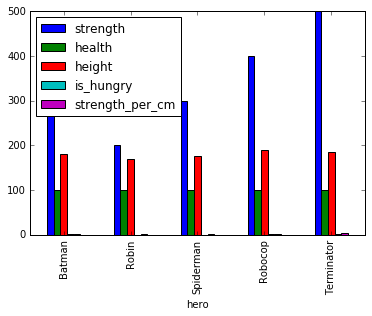

In [98]:
indexed_heroes.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a364710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ab7e890>], dtype=object)

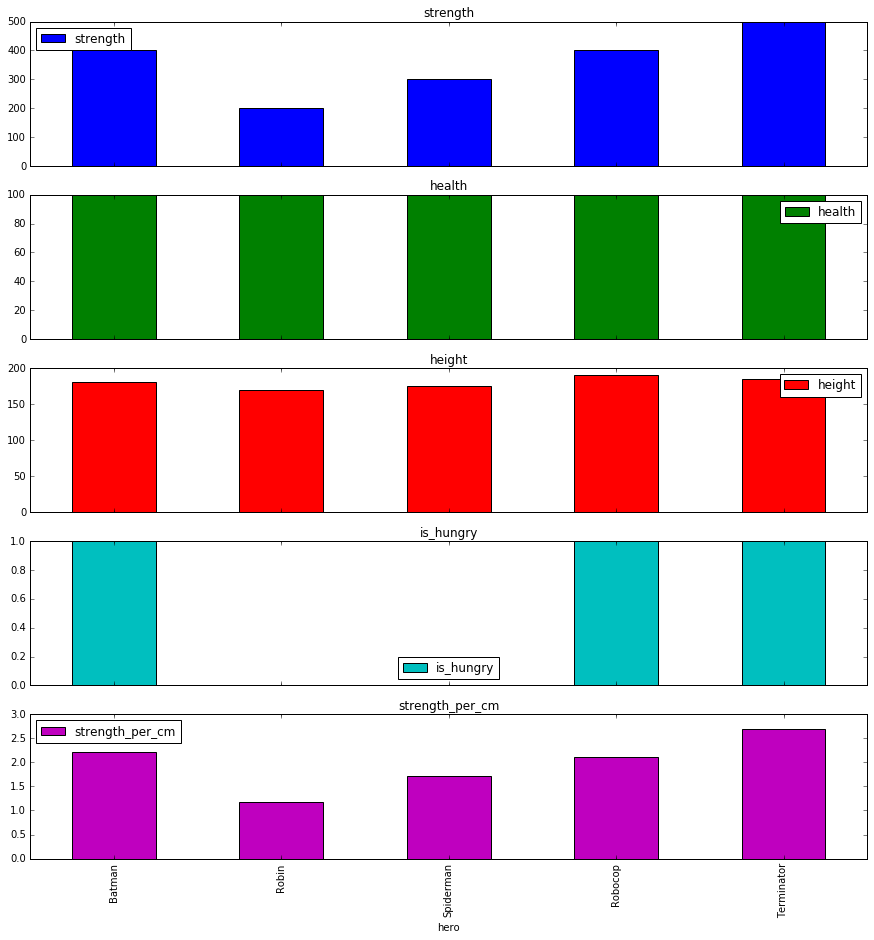

In [100]:
indexed_heroes.plot(kind='bar', subplots=True, figsize=(15, 15))

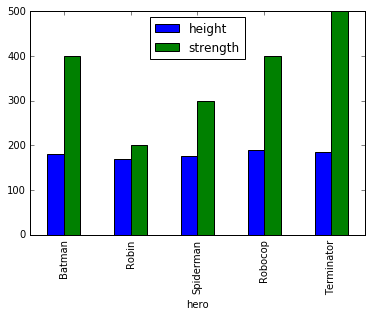

In [101]:
indexed_heroes[['height', 'strength']].plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ba61a50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10be80f90>]], dtype=object)

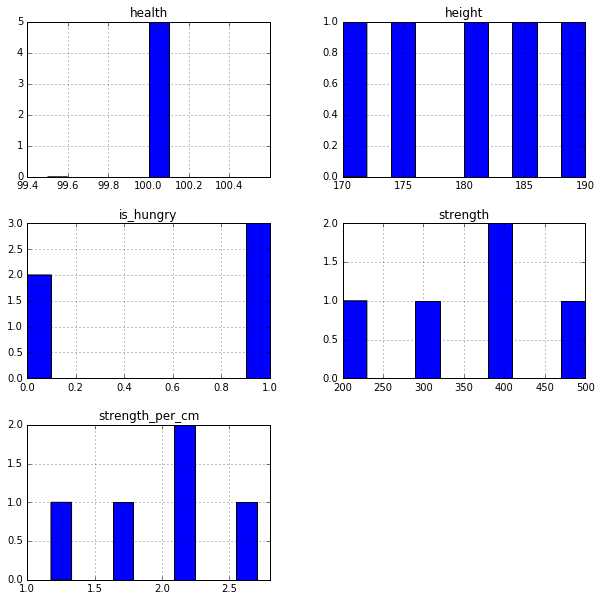

In [103]:
heroes.hist(figsize=(10, 10))

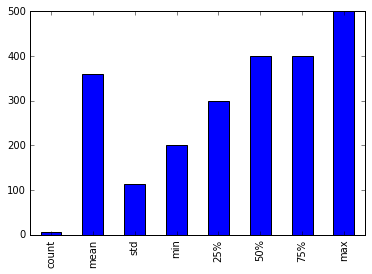

In [108]:
heroes.describe()['strength'].plot(kind='bar')

#### EXERCISE
1. Create a chart presenting grosses of movies directed by Christopher Nolan
2. What are typical durations of the movies?

TODO: more exercises ?

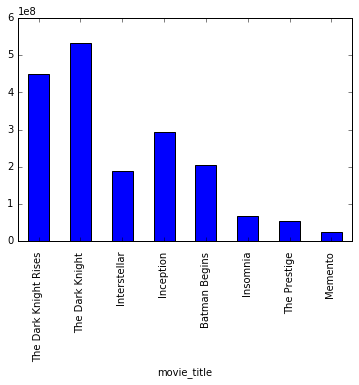

In [110]:
# Solution 1

nolan_movies = movies[movies['director_name'] == 'Christopher Nolan']
nolan_movies = nolan_movies.set_index('movie_title')

nolan_movies['gross'].plot(kind='bar')

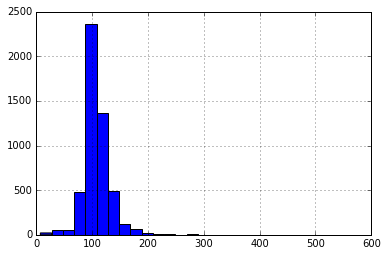

In [114]:
# Solution 2

movies['duration'].hist(bins=25)

## Aggregation (groupby, join)

#### SHOW
- groupby (with multi-levels)
- join? (Matti had idea for exercise)

#### EXERCISE

1. What is the size of industry every year?
2. Which director earns the most on average?
3. Does the color of movie matters in terms of their gross across time?

then

## Understanding index, datetime indexes

#### SHOW
- types of indexes
- loc?
- data alignment. Assignment on index
- extra methods of datetime index
  - date range selection ( ["2015-1":] )
  - resampling
  - bfill, ffill
  
#### EXERCISE

1. EXPLORE DATASET TO FIND OUT NICE EXERCISE

then


## Advanced topics + Advanced exercises

#### SHOW
- fillna
- basics of scikit-learn (nice example to copy from my presentation)

#### EXERCISE

1. Integration with scikit-learn
2. Integration with Flask
3. Poor man's recommendations engine
4. Discovering similar movies based on plot, genre, cast
5. Saving data to sqllite
6. What are the most profitable actors across time?
7. Filling missing data